<a href="https://colab.research.google.com/github/xoyeon/hongong-mldl/blob/main/06_3_%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원과 차원 축소
**특성** : 데이터가 가진 속성   
머신러닝에서는 특성을 **차원(dimension)**이라고 부르며, 차원을 줄인다면 저장 공간 절약 가능

* 1차원 배열(벡터)에서의 차원은 *원소의 개수*
* 2차원 배열에서의 차원은 *행과 열*
* 다차원 배열에서는 *축 개수*

**차원 축소(dimensionality reduction) 알고리즘** : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법   
--> 대표적인 차원 축소 알고리즘은 **주성분 분석(principal component analysis, PCA)**

# 주성분 분석 소개
* 주성분 분석(PCA)은 데이터에 있는 분산이 큰 방향을 찾는 것
* 분산은 데이터가 널리 퍼져있는 정도


--- 솔직히 무슨 말인지 잘 이해 안 됨,, 헣 나 자신에게 쏴리👻

# PCA 클래스

In [2]:
# 데이터 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2021-09-30 04:24:37--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-09-30 04:24:37--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-09-30 04:24:38--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

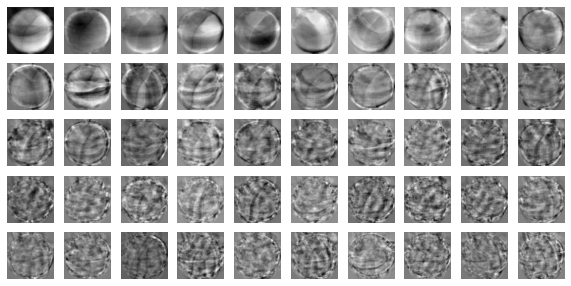

In [7]:
# 주성분은 100 x 100 크기의 이미지처럼 출력
draw_fruits(pca.components_.reshape(-1,100,100))

In [8]:
# PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄이기
print(fruits_2d.shape)  ## 10000개의 픽셀을 가진 300개의 이미지

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
## 데이터를 10000에서 30으로 줄임

(300, 50)


# 원본 데이터 재구성

In [10]:
# inverse_transform() 메서드를 사용하여 특성 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


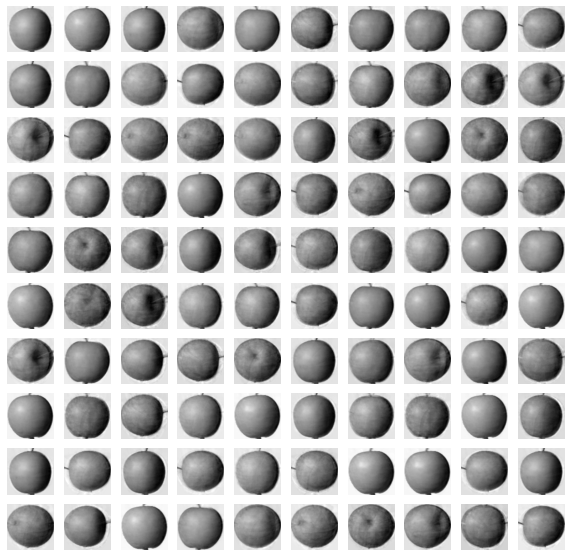

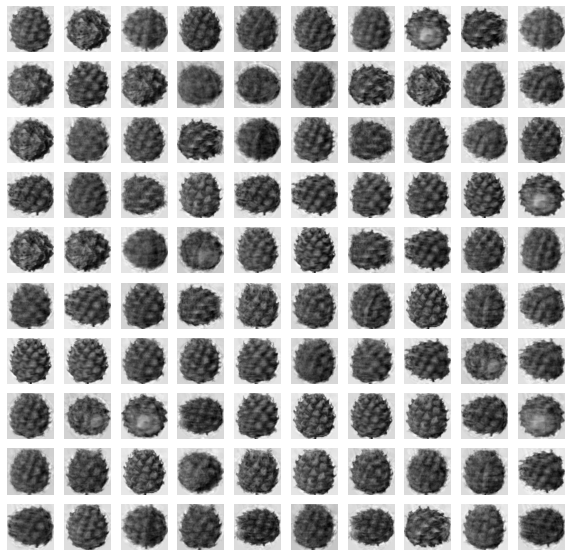

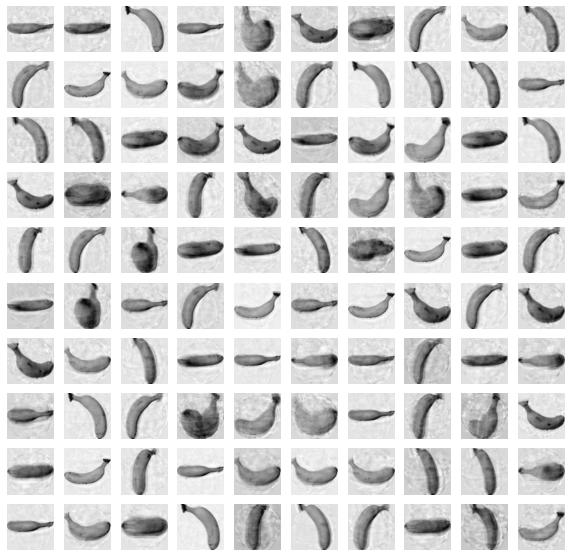

In [11]:
# 100 x 100 크기로 바꾸어 100개씩 나누어 출력
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

# 설명된 분산
설명된 분산(explained variance) : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있음

In [12]:
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음
print(np.sum(pca.explained_variance_ratio_))

0.921583886204154


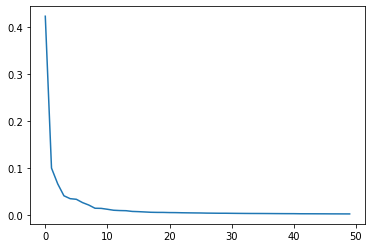

In [14]:
# 분산 비율을 그래프로 그려 보면 적절한 주성분의 개수를 찾는 데 도움이 됨
plt.plot(pca.explained_variance_ratio_)
plt.show()  ## 처음 10개의 주성분이 대부분의 분산을 표현하고 있음

# 다른 알고리즘과 함께 사용하기
과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아보자

In [15]:
# 로지스틱 회귀 모델을 사용하여 사진 분류하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [16]:
# 타깃 데이터 반들기
target = np.array([0]*100 + [1]*100 + [2]*100)

In [17]:
# 교차 검증 수행
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))  ## 각 교차 검증 폴드의 훈련 시간

0.9966666666666667
1.4691720962524415


In [18]:
# 위의 값을 PCA로 축소한 fruits_pca를 사용했을 때와 비교하기
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.029740524291992188


In [19]:
# PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음
pca = PCA(n_components=0.5)  ## 분산의 50%에 달하는 주성분을 찾도록 PCA 모델 만들기
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print(pca.n_components_)  ## 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음

2


In [21]:
# 이 모델로 원본 데이터 변환하기
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [22]:
# 교차 검증 결과 확인
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04235033988952637


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [24]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


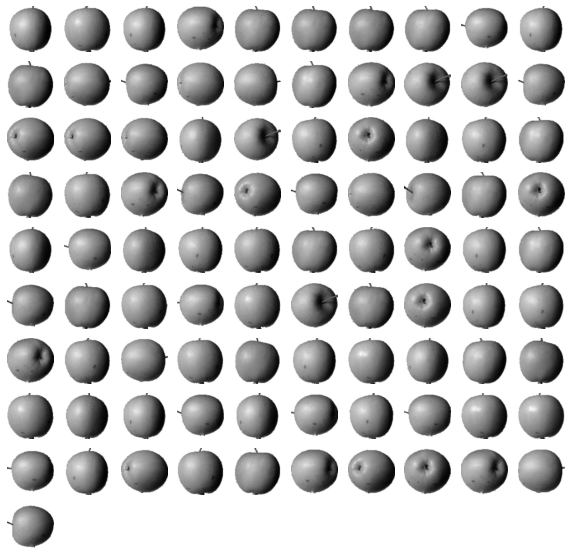

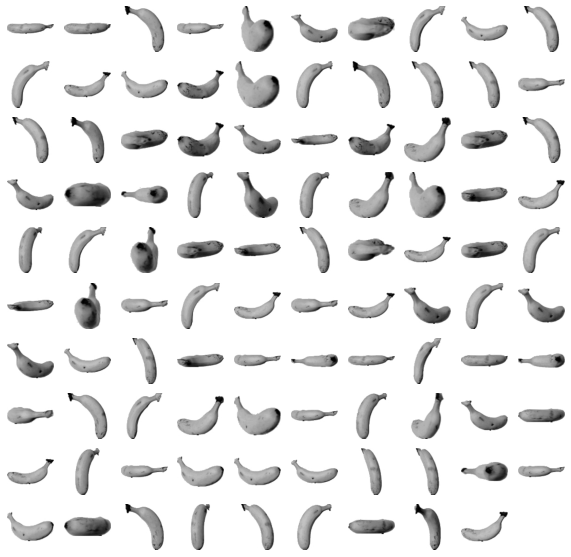

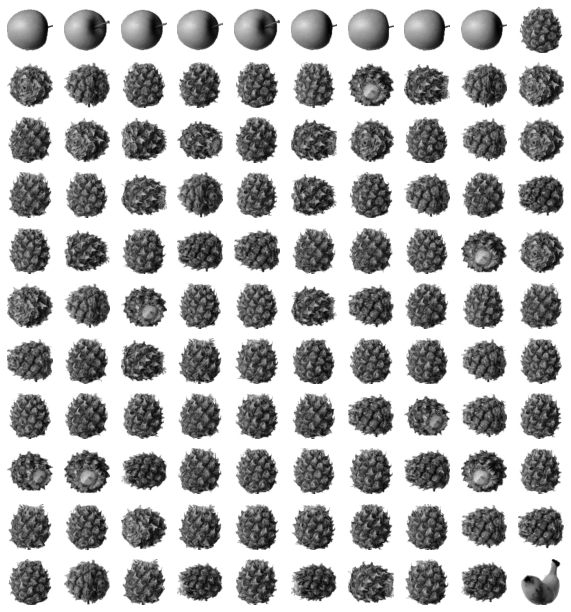

In [25]:
# KMeans가 찾은 레이블을 사용해 과일 이미지 출력
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

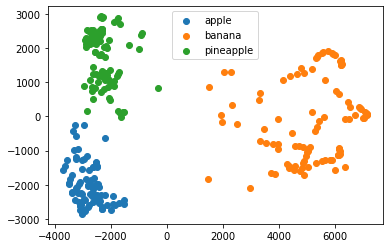

In [26]:
# km.labels_를 사용해 클러스터별로 나누어 산점도 그리기
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()